# TREADMILL BUYER PROFILE

## TASK
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Products
- The KP281 is an entry-level treadmill that sells for \$1,500.
- The KP481 is for mid-level runners and sells for \$1,750.
- The KP781 treadmill is having advanced features and it sells for \$2,500.

### Data Description
The company collected data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset in aerofit_treadmill_data.csv has the following features:

- Product - product purchased: KP281, KP481, or KP781
- Age - in years
- Gender - male/female
- Education - in years
- MaritalStatus - single or partnered
- Usage - the average number of times the customer plans to use the treadmill each week
- Fitness - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape
- Income - annual income in US dollars
- Miles - the average number of miles the customer expects to walk/run each week

## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
#IMPORT THE DATA
df = pd.read_csv("aerofit_treadmill_data.csv")

In [3]:
#LOOKING AT DATA
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
#Get size of data 180 rows 9 columns
df.shape

(180, 9)

In [5]:
#Get column types
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
# Changing these to categorical values as it makes it easier to communicate them as categories to other functions in python and they take on limited values
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [7]:
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

### Statistical Summary

In [8]:
# summarize the data and include all values
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


##### Observations:
- 3 types of products as expected
- No values are missing or blank in any column
- Age is between 18 and 50, 75% of buyers are 33 or younger
- Majority of buyers are Male and married
- Possible income disparity due to high stdev
- Some people run a lot more then others as the stdev disparity shows this

In [9]:
#Check for duplicate rows
df.duplicated().sum()

0

## Non-Graphical Analysis

In [10]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [12]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

## Graphical Analysis

### Density Plots

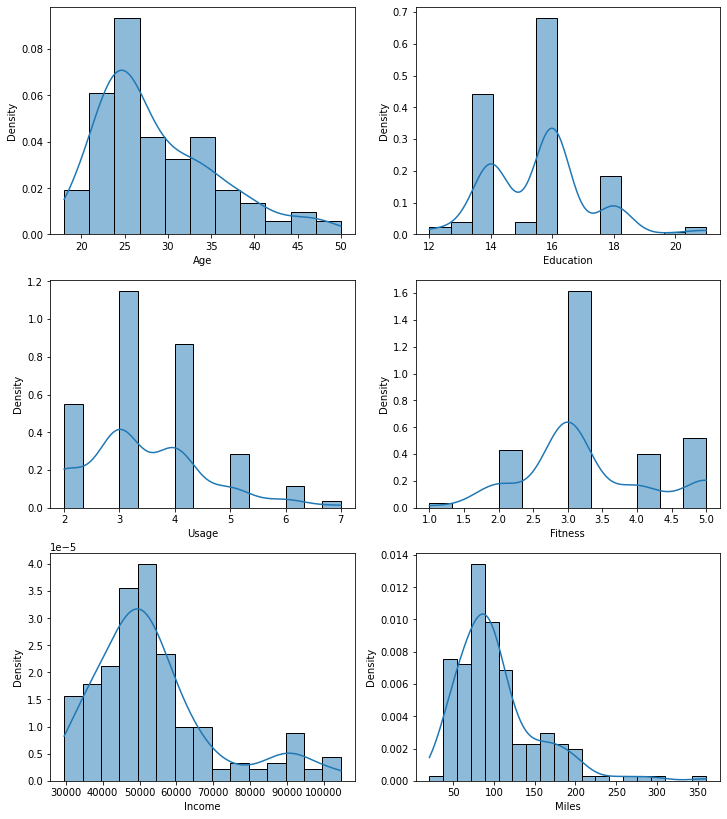

In [13]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize = (12,10))
fig.subplots_adjust(top=1.2)

sns.histplot(df['Age'], kde=True, ax=axis[0,0], stat = 'density')
sns.histplot(df['Education'], kde=True, ax=axis[0,1], stat ='density')
sns.histplot(df['Usage'], kde=True, ax=axis[1,0], stat = 'density')
sns.histplot(df['Fitness'], kde=True, ax=axis[1,1], stat = 'density')
sns.histplot(df['Income'], kde=True, ax=axis[2,0], stat = 'density')
sns.histplot(df['Miles'], kde=True, ax=axis[2,1], stat = 'density')
plt.show()

#### Observations:
- Miles and Income have outliers as right skewed majority of distribution on concentrated on the left
- Customers of fitness level 3 or customers with education of 16 buy most of the treadmills
- Mainly younger people have these treadmills, possibly as they are trying to achieve a certain body comp or training

### Count Plots

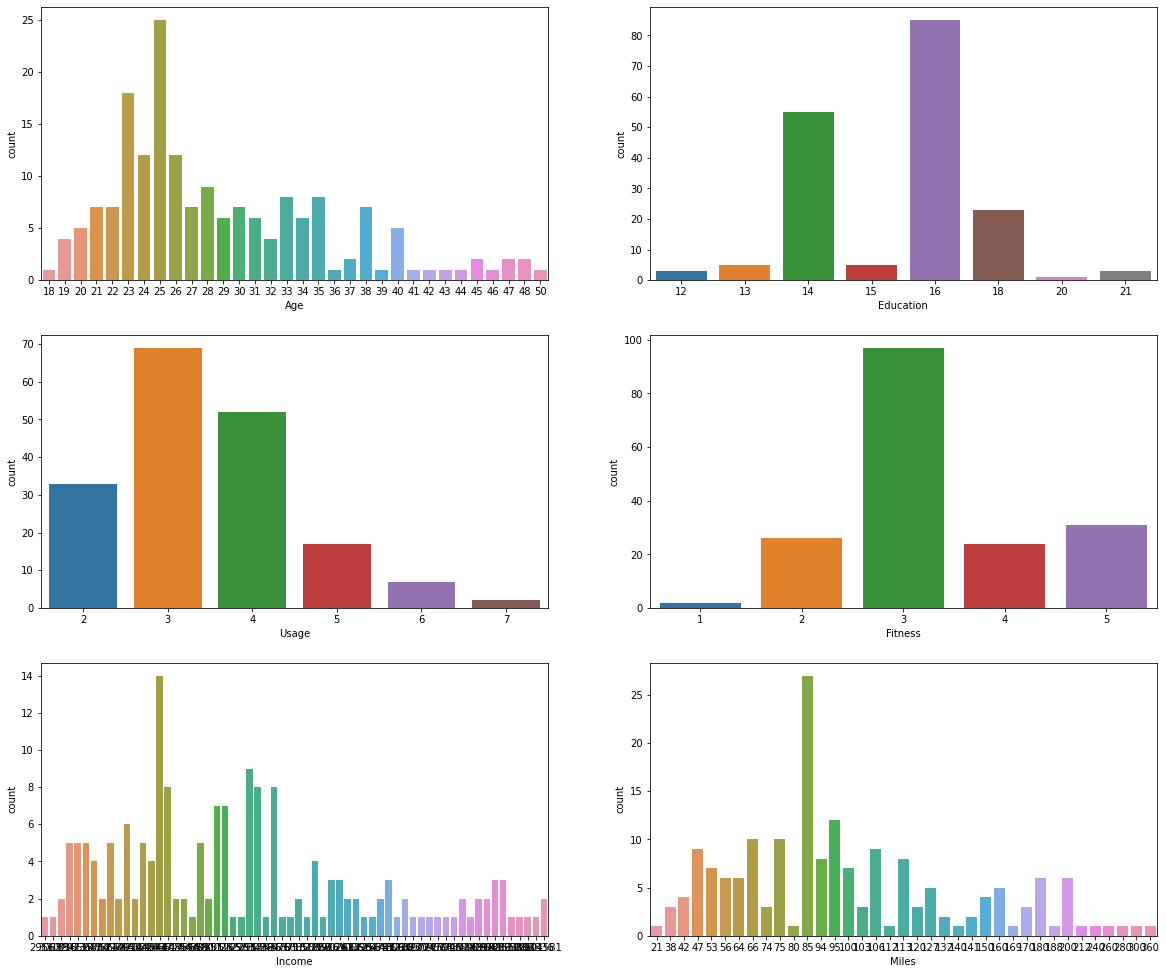

In [14]:
# Counts for each of the values
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=df, x="Age", ax=axis[0,0])
sns.countplot(data=df, x="Education", ax=axis[0,1])
sns.countplot(data=df, x="Usage", ax=axis[1,0])
sns.countplot(data=df, x="Fitness", ax=axis[1,1])
sns.countplot(data=df, x="Income", ax=axis[2,0])
sns.countplot(data=df, x="Miles", ax=axis[2,1])
plt.show()

Confirms previous observations where younger people are using the treadmills more and people with education 16 or fitness level 3 are also the ones buying them more.

### Box and Whisker Plots

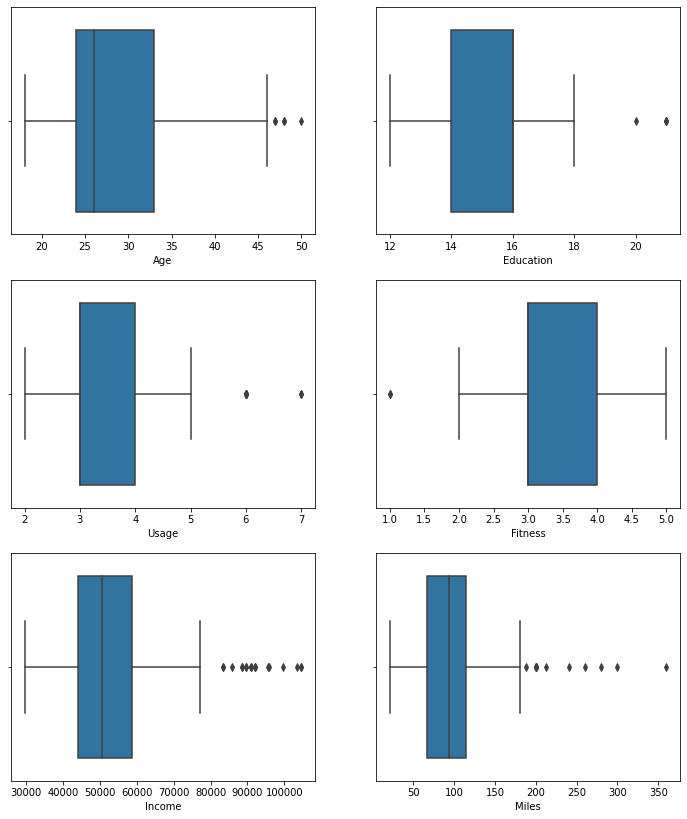

In [15]:
# Show outliers in the values
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

#### Observations:
- Fitness and education have very litte outliers
- We can see that Miles and Income have the most outliers as we predicted earlier on
- Median of the age is around 26, meaning that people older than 18 and younger than 26 are buying 50% of the treadmill (younger people buy them more)

### Bar Charts for Categorial Values

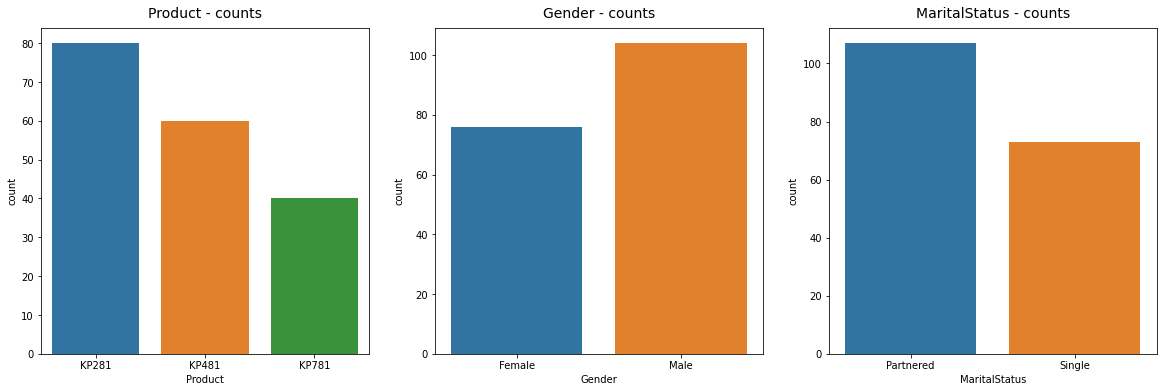

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

#### Observations:
- KP281 is the most sold treadmill
- Males are using the treadmills more
- Partnered people are buying them more as well

### Product vs Categorical Columns (Bivariate)
Seeing if categorical features have any effect on the product that is purchased

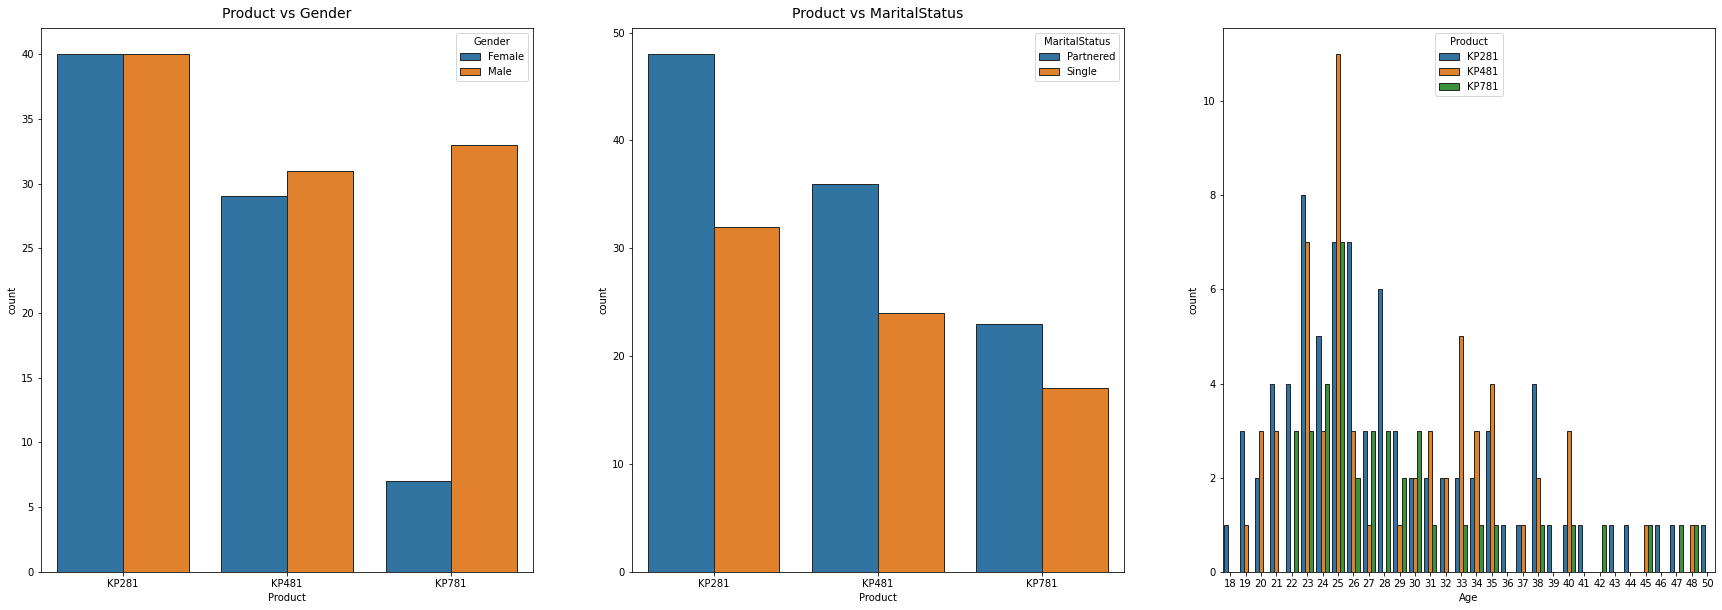

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", ax=axs[1])
sns.countplot(data=df, x='Age', hue='Product', edgecolor="0.15", ax=axs[2])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

#### Observations:
- Mainly males buy the KP781, other treadmills are even between the genders
- Partnered people buy more of every treadmill available, then single people
- Age is harder to see, but easiest to see is that KP481 is preferred by people at the age of 25

### Product vs Continuous Columns (Bivariate)
Seeing if continuous features have any effect on the product that is purchased

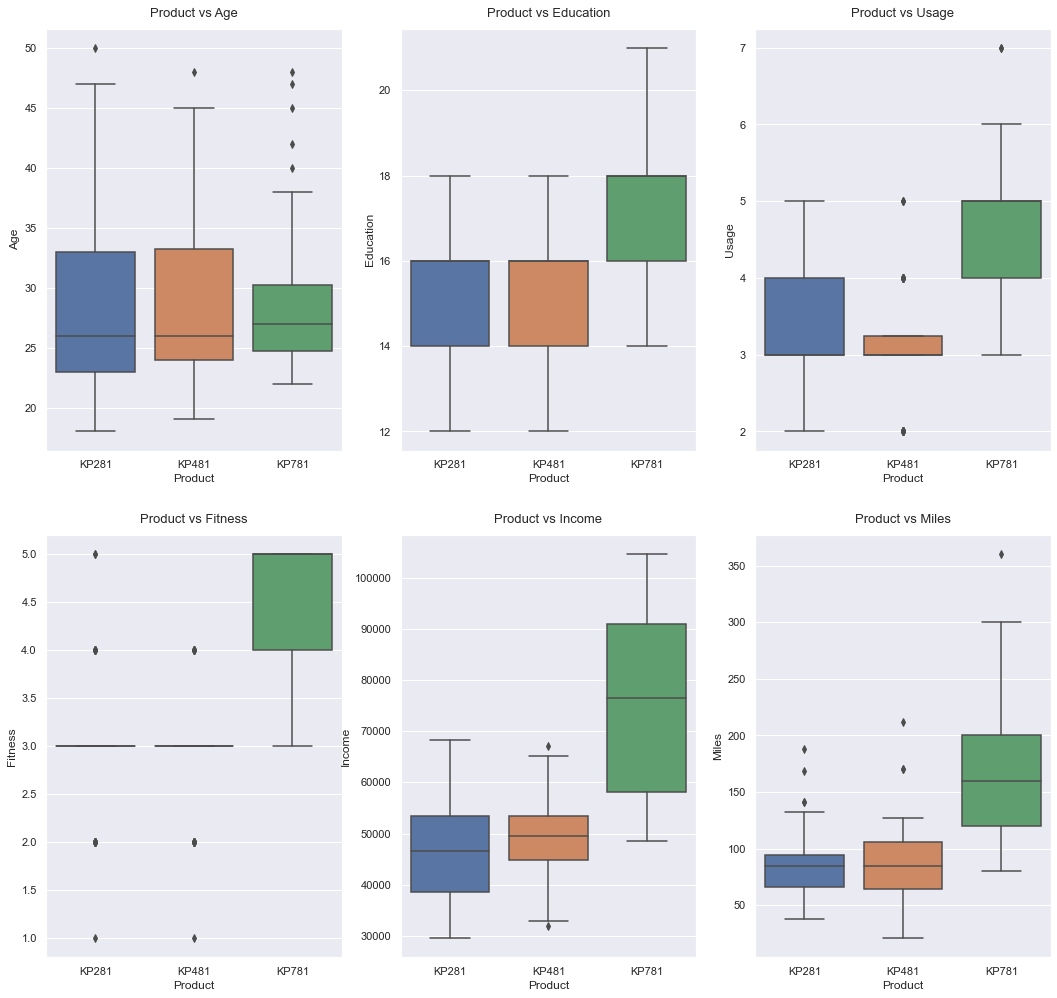

In [18]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attributes[count], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

#### Observations:
- ##### Product vs Age:
    - All treadmills equally bought no matter the age
    - Median is the same for KP481 and KP281
- ##### Product vs Education
    - People buying KP781 have higher education then others, possibly more affordable to them due to having a higher income due to the fact they have a higher education
    - People with education less than or equal to 16 have a equal chance of buying KP281 or KP481
- ##### Product vs Usuage
    - People who use the treadmill a lot buy the KP781 as they can take advantage of increased features even more
- ##### Product vs Fitness
    - Fitter customers buy the KP781, similar to usuage they will take advantage of the increased features
- ##### Product vs Income
    - People with higher incomes can afford the KP781 more
- ##### Product vs Miles
    - Customers who run more buy the KP781, similar to usuage they will take advantage of the increased features

### Multivariate Analysis

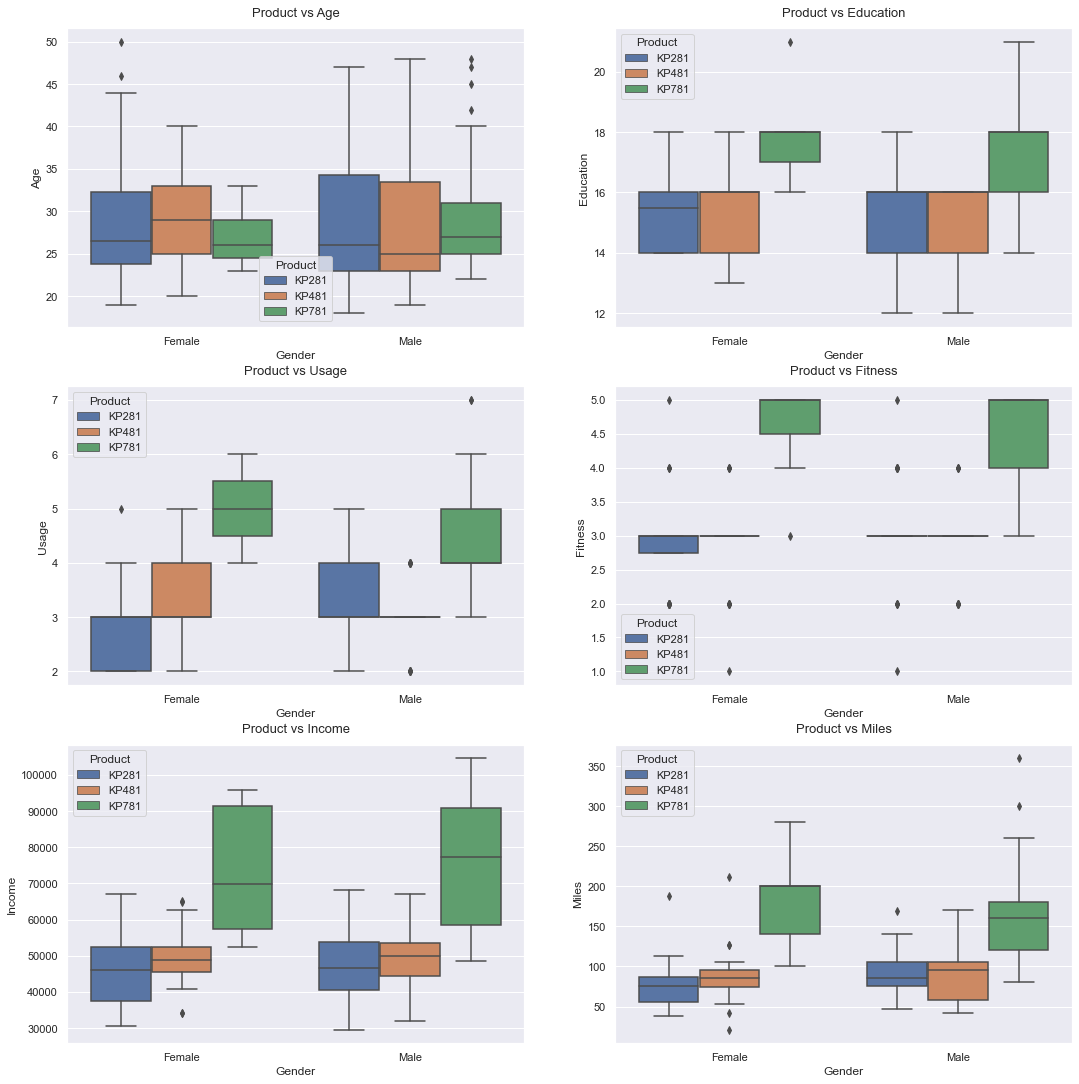

In [19]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes=True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

#### Observations:
- We still see that people with higher education, irrespective of gender will purchase the KP781
- We see key distinctions in females when they buy treadmills, if they are using for 2-3 hours they purchase KP281, 3-4 hours KP481 and KP781 if more than 4 hours
- People buy the KP781 irrespective of gender if they have higher fitness, income and more miles ran

## Correlation Analysis

In [20]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [21]:
df.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


#### Observations:
- Miles and Fitness and Miles and Usage are highly correlated, which makes sense that people who run more have better fitness. They will also be buying more treadmills
- Income and Education has good correlation as well
- Age and usage have low correlation meaning age does not effect the amount a person uses a treadmill

## Marginal and Conditional Probabilities
Percent of customers have purchased the 3 different treadmills and how their gender and marital status dictate which product they bought.

In [22]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
(df1.groupby(['variable', 'value'])[['value']].count() / len(df)).mul(100).round(3).astype(str) + '%'

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

In [23]:
def p_prod_given_gender(gender):
    if gender != "Female" and gender != "Male":
        return "Invalid gender value."
    
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
        
    print(f"P(KP281/{gender}): {p_281:.2f}") 
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP781/{gender}): {p_781:.2f}\n")
    
p_prod_given_gender('Male')
p_prod_given_gender('Female')

P(KP281/Male): 0.38
P(KP481/Male): 0.30
P(KP781/Male): 0.32

P(KP281/Female): 0.53
P(KP481/Female): 0.38
P(KP781/Female): 0.09



In [24]:
def p_prod_given_ms(status):
    if status != "Single" and status != "Partnered":
        return "Invalid marital status value."
    
    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_281 = df1['KP281'][status] / df1.loc[status].sum()
    p_481 = df1['KP481'][status] / df1.loc[status].sum()
    p_781 = df1['KP781'][status] / df1.loc[status].sum()
        
    print(f"P(KP281/{status}): {p_281:.2f}") 
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP781/{status}): {p_781:.2f}\n")
    
p_prod_given_ms('Single')
p_prod_given_ms('Partnered')

P(KP281/Single): 0.44
P(KP481/Single): 0.33
P(KP781/Single): 0.23

P(KP281/Partnered): 0.45
P(KP481/Partnered): 0.34
P(KP781/Partnered): 0.21



### Product - Gender Conditional Probabilities

In [25]:
product_gender = pd.crosstab(index=df['Product'], columns=[df['Gender']], margins=True)

In [26]:
# Probability of a customer being a Female given that Product is one of the treadmills
#P(A|B) = P(A,B)/P(B) - Bayes' Theorem
#P(Female|KP281) = P(Female,Product)/P(Product)
Gender = ['Male', 'Female']

for item in Gender:
    prob = round((product_gender[item]['KP281'] / product_gender['All']['KP281']),2)
    pct_1 = round(prob*100,2)
    pct_1

    prob = round((product_gender[item]['KP481'] / product_gender['All']['KP481']),2)
    pct_2 = round(prob*100,2)
    pct_2

    prob = round((product_gender[item]['KP781'] / product_gender['All']['KP781']),2)
    pct_3 = round(prob*100,2)
    pct_3

    print(f"P({item}/KP281): {pct_1:.2f}") 
    print(f"P({item}/KP481): {pct_2:.2f}")
    print(f"P({item}/KP781): {pct_3:.2f}\n")

P(Male/KP281): 50.00
P(Male/KP481): 52.00
P(Male/KP781): 82.00

P(Female/KP281): 50.00
P(Female/KP481): 48.00
P(Female/KP781): 18.00



#### Observations:
- Females tend to buy KP281 and KP481
- Males mainly buy the KP781

### Product - Age Conditional Probabilities
Since there are many ages, we will put them in categories and find probabilites for those categories

In [27]:
df2 = df.copy()

# Adding 2 new features from Age:
# "AgeCategory" - Teens, 20s, 30s and Above 40s
# "AgeGroup" - 14-20 , 20-30, 30-40 & 40-60

bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
df2['AgeGroup'] = pd.cut(df2['Age'], bins)
df2['AgeCategory'] = pd.cut(df2['Age'], bins,labels=labels)
df2

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,"(30, 40]",30s
176,KP781,42,Male,18,Single,5,4,89641,200,"(40, 60]",Above 40s
177,KP781,45,Male,16,Single,5,5,90886,160,"(40, 60]",Above 40s
178,KP781,47,Male,18,Partnered,4,5,104581,120,"(40, 60]",Above 40s


In [28]:
product_age = pd.crosstab(index=df2['Product'], columns=[df2['AgeCategory']],margins=True)
product_age

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [29]:
# Percentage of customers with Age groups among all customers
for item in labels:
    prob = round((product_age[item]['All'] / product_age['All']['All']),2)
    pct = round(prob*100,2)
    pct
    print(f"P({item}): {pct:.2f}")

P(Teens): 6.00
P(20s): 61.00
P(30s): 27.00
P(Above 40s): 7.00


In [30]:
# Probability of a customer being a certain age given that Product is one of the treadmills
#P(A|B) = P(A,B)/P(B) - Bayes' Theorem
#P(Age Group|KP281) = P(Age Group,Product)/P(Product)

for item in labels:
    prob = round((product_age[item]['KP281'] / product_age['All']['KP281']),2)
    pct_1 = round(prob*100,2)
    pct_1

    prob = round((product_age[item]['KP481'] / product_age['All']['KP481']),2)
    pct_2 = round(prob*100,2)
    pct_2

    prob = round((product_age[item]['KP781'] / product_age['All']['KP781']),2)
    pct_3 = round(prob*100,2)
    pct_3

    print(f"P({item}/KP281): {pct_1:.2f}") 
    print(f"P({item}/KP481): {pct_2:.2f}")
    print(f"P({item}/KP781): {pct_3:.2f}\n")

P(Teens/KP281): 8.00
P(Teens/KP481): 7.00
P(Teens/KP781): 0.00

P(20s/KP281): 61.00
P(20s/KP481): 52.00
P(20s/KP781): 75.00

P(30s/KP281): 24.00
P(30s/KP481): 38.00
P(30s/KP781): 15.00

P(Above 40s/KP281): 8.00
P(Above 40s/KP481): 3.00
P(Above 40s/KP781): 10.00



#### Observations:
- Teens and above 40's do not buy many treadmills 
- 61% of customers are in their 20's and each of the treadmill is most popular among people in their 20's
- People above 40's tend to prefer the KP781

### Product - Income Conditional Probabilities
Since there are many incomes, we will put them in categories and find probabilites for those categories

In [31]:
df3 = df.copy()
bins_income = [29000, 35000, 60000, 85000, 105000]
labels_income = ['Low Income','Lower-middle Income','Upper-Middle Income', 'High Income']
df3['IncomeCategory'] = pd.cut(df3['Income'],bins_income,labels = labels_income)
df3

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,IncomeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Lower-middle Income
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Upper-Middle Income
176,KP781,42,Male,18,Single,5,4,89641,200,High Income
177,KP781,45,Male,16,Single,5,5,90886,160,High Income
178,KP781,47,Male,18,Partnered,4,5,104581,120,High Income


In [32]:
product_income = pd.crosstab(index=df3['Product'], columns=[df3['IncomeCategory']],margins=True)
product_income

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [33]:
# Percentage of customers with income groups among all customers
for item in labels_income:
    prob = round((product_income[item]['All'] / product_income['All']['All']),2)
    pct = round(prob*100,2)
    pct
    print(f"P({item}): {pct:.2f}")

P(Low Income): 8.00
P(Lower-middle Income): 69.00
P(Upper-Middle Income): 14.00
P(High Income): 9.00


In [34]:
# Probability of a customer being a certain income group given that Product is one of the treadmills
#P(A|B) = P(A,B)/P(B) - Bayes' Theorem
#P(Income Group|KP281) = P(Income Group,Product)/P(Product)

for item in labels_income:
    prob = round((product_income[item]['KP281'] / product_income['All']['KP281']),2)
    pct_1 = round(prob*100,2)
    pct_1

    prob = round((product_income[item]['KP481'] / product_income['All']['KP481']),2)
    pct_2 = round(prob*100,2)
    pct_2

    prob = round((product_income[item]['KP781'] / product_income['All']['KP781']),2)
    pct_3 = round(prob*100,2)
    pct_3

    print(f"P({item}/KP281): {pct_1:.2f}") 
    print(f"P({item}/KP481): {pct_2:.2f}")
    print(f"P({item}/KP781): {pct_3:.2f}\n")

P(Low Income/KP281): 10.00
P(Low Income/KP481): 10.00
P(Low Income/KP781): 0.00

P(Lower-middle Income/KP281): 82.00
P(Lower-middle Income/KP481): 78.00
P(Lower-middle Income/KP781): 28.00

P(Upper-Middle Income/KP281): 8.00
P(Upper-Middle Income/KP481): 12.00
P(Upper-Middle Income/KP781): 30.00

P(High Income/KP281): 0.00
P(High Income/KP481): 0.00
P(High Income/KP781): 42.00



#### Observations:
- Lower-middle income earners buy the most treadmills 
- 69% of customers are earning Lower-middle income and each of the treadmill is most popular among people in this income group
- High Income earners only buy the KP781
- Upper-Middle income earners tend to prefer the KP781

### Product - Fitness Conditional Probabilities

In [35]:
product_fitness = pd.crosstab(index=df['Product'], columns=[df['Fitness']],margins=True)
product_fitness

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [36]:
fitness = [1,2,3,4,5]
for item in fitness:
    prob = round((product_fitness[item]['All'] / product_fitness['All']['All']),2)
    pct_1 = round(prob*100,2)
    pct_1
    print(f"P({item}): {pct_1:.2f}")

P(1): 1.00
P(2): 14.00
P(3): 54.00
P(4): 13.00
P(5): 17.00


In [37]:
for item in fitness:
    prob = round((product_fitness[item]['KP281'] / product_fitness['All']['KP281']),2)
    pct_1 = round(prob*100,2)
    pct_1

    prob = round((product_fitness[item]['KP481'] / product_fitness['All']['KP481']),2)
    pct_2 = round(prob*100,2)
    pct_2

    prob = round((product_fitness[item]['KP781'] / product_fitness['All']['KP781']),2)
    pct_3 = round(prob*100,2)
    pct_3

    print(f"P({item}/KP281): {pct_1:.2f}") 
    print(f"P({item}/KP481): {pct_2:.2f}")
    print(f"P({item}/KP781): {pct_3:.2f}\n")

P(1/KP281): 1.00
P(1/KP481): 2.00
P(1/KP781): 0.00

P(2/KP281): 18.00
P(2/KP481): 20.00
P(2/KP781): 0.00

P(3/KP281): 68.00
P(3/KP481): 65.00
P(3/KP781): 10.00

P(4/KP281): 11.00
P(4/KP481): 13.00
P(4/KP781): 18.00

P(5/KP281): 2.00
P(5/KP481): 0.00
P(5/KP781): 72.00



#### Observations:
- Fitness level 3 buy the most treadmills 
- 54% of customers are Fitness Level 3 and KP281 and KP481 treadmills are the most popular among people in this fitness group
- Fitness level 5 mainly buy the KP781

### Product - Marital Status Conditional Probabilities

In [38]:
product_marital = pd.crosstab(index=df['Product'], columns=[df['MaritalStatus']],margins=True)
product_marital

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [39]:
status = ['Single', 'Partnered']
for item in status:
    prob = round((product_marital[item]['All'] / product_marital['All']['All']),2)
    pct_1 = round(prob*100,2)
    pct_1
    print(f"P({item}): {pct_1:.2f}")

P(Single): 41.00
P(Partnered): 59.00


In [40]:
for item in status:
    prob = round((product_marital[item]['KP281'] / product_marital['All']['KP281']),2)
    pct_1 = round(prob*100,2)
    pct_1

    prob = round((product_marital[item]['KP481'] / product_marital['All']['KP481']),2)
    pct_2 = round(prob*100,2)
    pct_2

    prob = round((product_marital[item]['KP781'] / product_marital['All']['KP781']),2)
    pct_3 = round(prob*100,2)
    pct_3

    print(f"P({item}/KP281): {pct_1:.2f}") 
    print(f"P({item}/KP481): {pct_2:.2f}")
    print(f"P({item}/KP781): {pct_3:.2f}\n")

P(Single/KP281): 40.00
P(Single/KP481): 40.00
P(Single/KP781): 42.00

P(Partnered/KP281): 60.00
P(Partnered/KP481): 60.00
P(Partnered/KP781): 57.00



#### Observations:
- Partenered buy the most treadmills 
- 59% of customers are partnered and all treadmills are the most popular among people in this status group. They buy each treadmill equally

## Outliers
Can be detected using box plots, replot of the box plot earlier

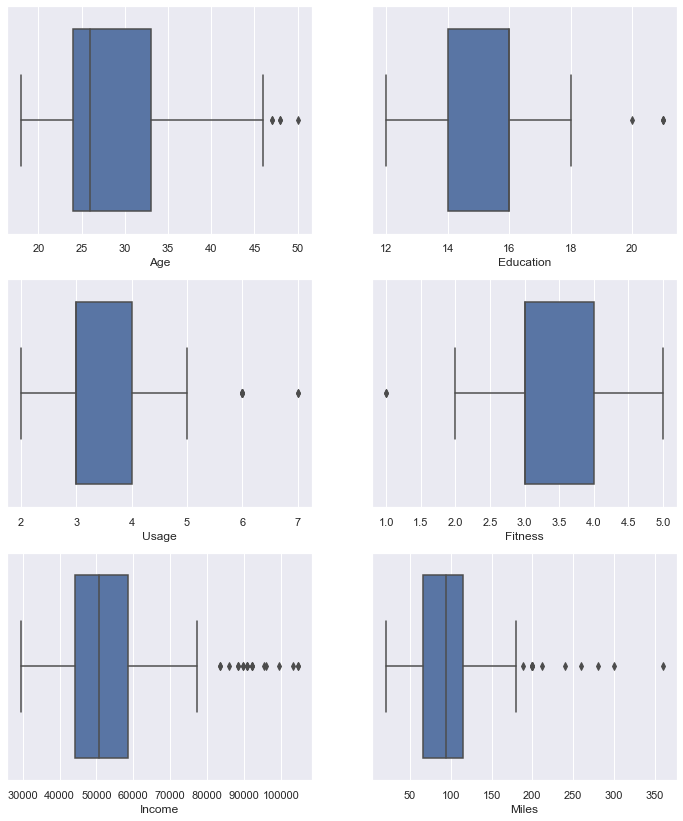

In [41]:
# Show outliers in the values
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

#### Observations:
- Income and miles have the most outliers as we can see by the multiple black dots outside the whiskers
- Only a few customers run more than 180 miles per week

### Handling Outliers for Income and Miles
A commonly used rule says that a data point is an outlier if it is more than 1.5 times above the third quartile or below the first quartile.

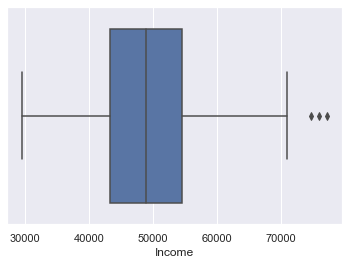

In [42]:
df4 = df.copy()

#Outlier Treatment: Removing using the IQR rule
Q3 = df4['Income'].quantile(0.75)
Q1 = df4['Income'].quantile(0.25)
IQR = Q3-Q1
df4 = df4[(df4['Income'] > Q1 - 1.5*IQR) & (df4['Income'] < Q3 + 1.5*IQR)]

sns.boxplot(data=df4, x="Income", orient='h')
plt.show()

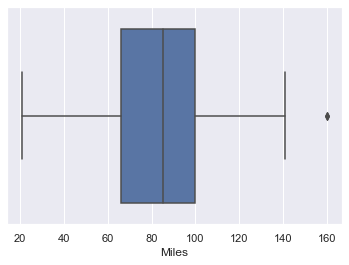

In [43]:
#Outlier Treatment: Removing using the IQR rule
Q3 = df4['Miles'].quantile(0.75)
Q1 = df4['Miles'].quantile(0.25)
IQR = Q3-Q1
df4 = df4[(df4['Miles'] > Q1 - 1.5*IQR) & (df4['Miles'] < Q3 + 1.5*IQR)]

sns.boxplot(data=df4, x="Miles", orient='h')
plt.show()

In [44]:
df.shape

(180, 9)

In [45]:
df4.shape

(147, 9)

#### Observations:
- After removing the outliers, we have removed 33 rows. There are still some but not as many. Outliers can provide insights for high-end models, so should not be removed for further analysis.

## Actionable Insights and Recommendations

### Actionable Insights:
- KP281 is the most sold treadmill at 44%.
- 88% of customers are purchased by customers between 20 and 40 years of age.
- Miles and Fitness & Miles and Usuage are highly correlated, which means if a customer's fitness level is high they use more treadmills.
- KP781 is the only model purchased by people with high education and high income.
- People with higher fitness tend to use higher end treadmill which have more features and their average number of miles is also higher.
- Majority of treadmill customers earn between 35,000 and 85,000 which is 83%

### Recommendations:
- KP281 and KP481 are the more affordable models, however if its possible to reduce features in KP281 and lower the cost. We can try to attract more low income earners to buy KP281 therefore increasing sales.
- KP781 should be advertised as a premium model and try to attract more runners and higher income earners to this product. The premium status can create an idea of it being made with higher quality and exclusivity which can result in higher sales.
- See if it is possible to attract more customers with low income, to expand its customer base. And if there is enough demand, see if it is possible to create a more affordable treadmill with less features for this income group

## Machine Learning
Creating ML algorithms to see if we can create a model to accurately predict which model of treadmill the consumer will buy. The challenge will be to create an accurate model as the amount of data points are low, more data is better to create more accurate models!

In [46]:
mldf = df.copy()

In [47]:
cat_col = mldf.select_dtypes(['category']).columns

In [48]:
mldf[cat_col] = mldf[cat_col].apply(lambda x: x.cat.codes)

In [49]:
mldf

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,18,1,14,1,3,4,29562,112
1,0,19,1,15,1,2,3,31836,75
2,0,19,0,14,0,4,3,30699,66
3,0,19,1,12,1,3,3,32973,85
4,0,20,1,13,0,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,2,40,1,21,1,6,5,83416,200
176,2,42,1,18,1,5,4,89641,200
177,2,45,1,16,1,5,5,90886,160
178,2,47,1,18,0,4,5,104581,120


### Categorical Variable changes:
- Marital Status: Single - 1 Partnered - 0
- Gender: Male - 1 Female - 0
- Product: KP281 - 0 KP481 - 1 KP781 - 2

In [50]:
x = mldf.loc[:, mldf.columns != 'Product']

In [51]:
x = np.array(x)
x

array([[    18,      1,     14, ...,      4,  29562,    112],
       [    19,      1,     15, ...,      3,  31836,     75],
       [    19,      0,     14, ...,      3,  30699,     66],
       ...,
       [    45,      1,     16, ...,      5,  90886,    160],
       [    47,      1,     18, ...,      5, 104581,    120],
       [    48,      1,     18, ...,      5,  95508,    180]], dtype=int64)

In [52]:
y = mldf['Product']
y = np.array(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int8)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [54]:
k_val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [55]:
# Train and visualize the models with varying k values
for i, k in enumerate(k_val):
    # Create KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
 
    # Train the model
    knn.fit(X_train, y_train)
 
    # Make predictions
    y_pred = knn.predict(X_test)
 
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("k = " + str(k) + " accuracy = " + str(accuracy))

k = 1 accuracy = 0.5666666666666667
k = 2 accuracy = 0.6166666666666667
k = 3 accuracy = 0.5333333333333333
k = 4 accuracy = 0.6333333333333333
k = 5 accuracy = 0.6333333333333333
k = 6 accuracy = 0.65
k = 7 accuracy = 0.6166666666666667
k = 8 accuracy = 0.6166666666666667
k = 9 accuracy = 0.6
k = 10 accuracy = 0.6
k = 11 accuracy = 0.5333333333333333
k = 12 accuracy = 0.5
k = 13 accuracy = 0.5166666666666667
k = 14 accuracy = 0.6
k = 15 accuracy = 0.5333333333333333
k = 16 accuracy = 0.6166666666666667
k = 17 accuracy = 0.55
k = 18 accuracy = 0.6
k = 19 accuracy = 0.6
k = 20 accuracy = 0.6


### Observations:
- Very poor accuracy with KNN classification, best k to be selected is k=6 to get an accuracy of 65%
- Very little data can also be the reason for this and not having a lot of points